# DenguDisease Analysis using Time Series Analysis

In [3]:
import pandas as pd
import numpy as np

In [4]:
Dengu = pd.read_csv('Data/DenguDiseas-TS.csv')
Dengu.head()

,year,Cases
0,2009-07,6
1,2009-08,186
2,2009-09,267
3,2009-10,248
4,2009-11,0


In [5]:
Dengu.tail()

,year,Cases
51,2019-08,69816
52,2019-09,23429
53,2019-10,8264
54,2019-11,6125
55,2019-12,1759


In [6]:
Dengu.shape

(56, 2)

# Data Preprocessing

In [7]:
#To check out have any null value in any column on our data set.
Dengu.isnull().sum()

year     0
Cases    0
dtype: int64

In [8]:
#Parse strings to datetime type
Dengu['year'] = pd.to_datetime(Dengu['year'], infer_datetime_format=True)
indexedDengu=Dengu.set_index(['year'])

In [9]:
indexedDengu.dtypes

Cases    int64
dtype: object

In [10]:
indexedDengu.describe()

,Cases
count,56.000000
mean,2968.142857
std,10111.678095
min,0.000000
25%,169.250000
50%,496.500000
75%,987.500000
max,69816.000000


In [11]:
#from datetime import datetime
indexedDengu.head(5)

,Cases
year,
2009-07-01,6
2009-08-01,186
2009-09-01,267
2009-10-01,248
2009-11-01,0


# Plot Our Dataset

In [12]:
import matplotlib.pylab as plt
%matplotlib inline

#Increas the figure size
from matplotlib.pylab import rcParams
rcParams["figure.figsize"]= 10 , 6

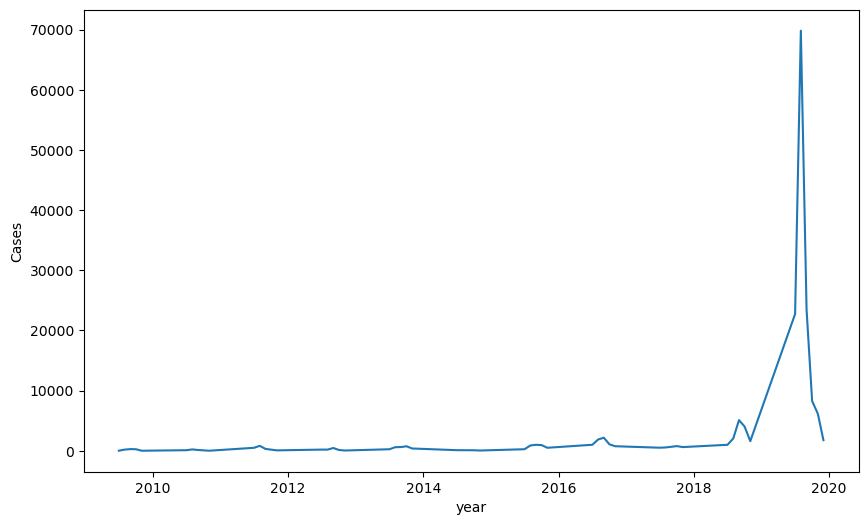

In [13]:
#Plot graph

plt.xlabel("year")
plt.ylabel("Cases")
plt.plot(indexedDengu)

<AxesSubplot:xlabel='year'>

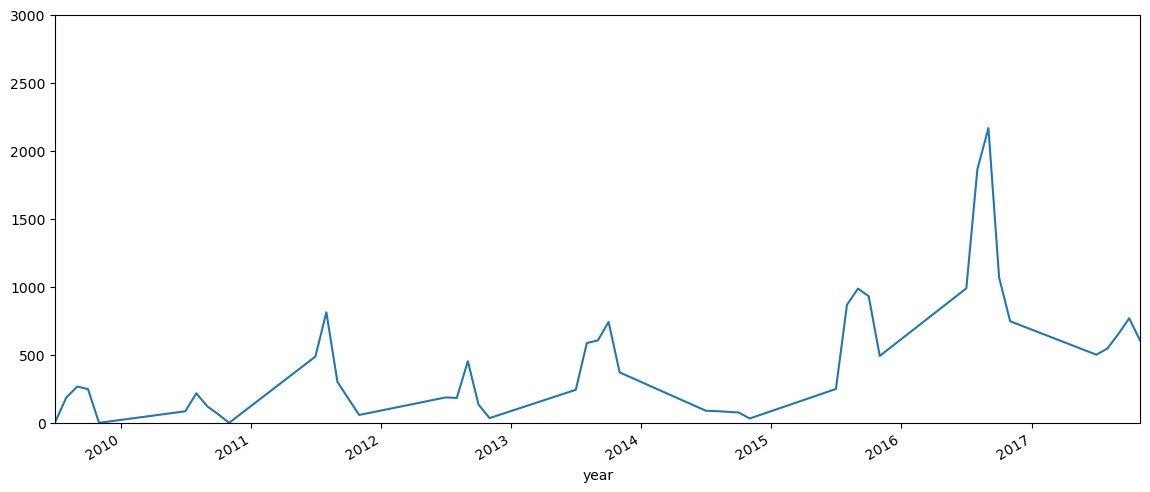

In [24]:
## xlimit and y limit
indexedDengu['Cases'].plot(xlim=['2009-07-01','2017-11-01'],ylim=[0,3000],figsize=(14,6))

# Checking stationarity

In [25]:
#Definition of stationarity = constant mean and variance

In [26]:
# Method 1 -  Rolling Statistics
# Method 2 -  Duckey fuller

# Determine rolling statisrics

In [27]:
rolmean = indexedDengu.rolling(window = 5).mean()
rolstd = indexedDengu.rolling(window =5).std()

print(rolmean , rolstd)

              Cases
year               
2009-07-01      NaN
2009-08-01      NaN
2009-09-01      NaN
2009-10-01      NaN
2009-11-01    141.4
2010-07-01    157.2
2010-08-01    163.4
2010-09-01    134.2
2010-10-01     97.4
2010-11-01     97.4
2011-07-01    177.8
2011-08-01    297.0
2011-09-01    333.0
2011-10-01    356.4
2011-11-01    368.0
2012-07-01    308.0
2012-08-01    182.0
2012-09-01    212.4
2012-10-01    203.0
2012-11-01    198.4
2013-07-01    209.6
2013-08-01    290.4
2013-09-01    321.0
2013-10-01    442.6
2013-11-01    509.8
2014-07-01    479.0
2014-08-01    378.8
2014-09-01    273.8
2014-10-01    140.6
2014-11-01     72.8
2015-07-01    104.8
2015-08-01    261.2
2015-09-01    442.4
2015-10-01    613.4
2015-11-01    705.4
2016-07-01    853.4
2016-08-01   1052.6
2016-09-01   1288.6
2016-10-01   1316.0
2016-11-01   1367.0
2017-07-01   1269.4
2017-08-01   1006.0
2017-09-01    703.4
2017-10-01    643.6
2017-11-01    614.8
2018-07-01    712.0
2018-08-01   1008.8
2018-09-01   1894.4


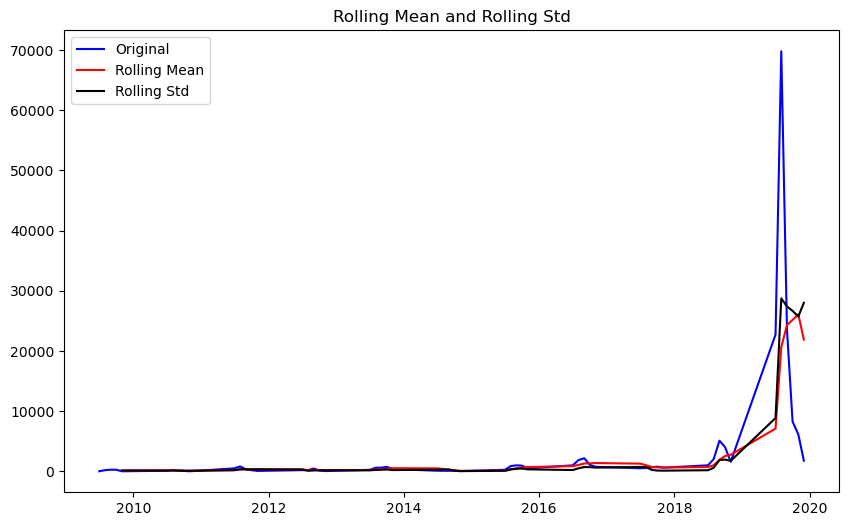

In [28]:
#plot rolling statisrics
orig = plt.plot(indexedDengu, color = "blue", label= "Original")
mean = plt.plot(rolmean, color = "red", label = "Rolling Mean")
std = plt. plot(rolstd, color = "black", label = "Rolling Std")
plt.legend(loc = "best")
plt.title("Rolling Mean and Rolling Std")
plt.show(block = False)

# Perform Augmented Dickey-Fuller test (ADF)

In [29]:
# ADF Test - nul hypothesis - non-stationary - if p-value < 5% reject null hypothesis

In [30]:
from statsmodels.tsa.stattools import adfuller

I:\ML-Code\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
I:\ML-Code\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [31]:
print("Result of Dickey-Fuller Test : ")

dftest= adfuller(indexedDengu["Cases"], autolag = "AIC") 

dfoutput = pd.Series(dftest[0:4], index = [
    "Test Statistic", "p-value", "#Lags Used", "Number of Observation Used"
])
for key,value in dftest[4].items():
    dfoutput["Critical Value (%s)"%key] = value

print(dfoutput)

Result of Dickey-Fuller Test : 
Test Statistic                -3.946064
p-value                        0.001721
#Lags Used                     0.000000
Number of Observation Used    55.000000
Critical Value (1%)           -3.555273
Critical Value (5%)           -2.915731
Critical Value (10%)          -2.595670
dtype: float64


In [32]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #determine rolling statistics
    movingAverage = timeseries.rolling(window = 5).mean()
    movingSTD = timeseries.rolling(window = 5).std()
    
    #plote rolling statistics
    orig = plt.plot(timeseries, color = 'blue', label = 'Original')
    mean = plt.plot(movingAverage, color = 'red', label = 'Rolling Mean')
    std = plt.plot(movingSTD, color = "black" , label ='Rolling Std' )
    plt.legend(loc = 'best')
    plt.title("Roling Mean and Standerd Deviation")
    plt.show(block = False)
    
    #Performing Dicky Fuller test:
    print("Result of Dickey Fuller Test: ")
    dftest= adfuller(timeseries, autolag= 'AIC')
    dfoutput = pd.Series(dftest[0:4], index= ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used '])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key]= value
    print(dfoutput)

# Component of Time Series

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [34]:
#decomposition = seasonal_decompose(indexedDengu)

In [35]:
decomposition= seasonal_decompose(x=indexedDengu["Cases"], model='additive', extrapolate_trend='freq', period=1)

In [36]:
# import statsmodels as sm
# import statsmodels.api as sm
# decomposition = sm.tsa.seasonal_decompose(indexedDengu)
# #fig = decomposition.plot()
# #matplotlib.rcParams['figure.figsize'] = [9.0,5.0]

In [37]:
trend    = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

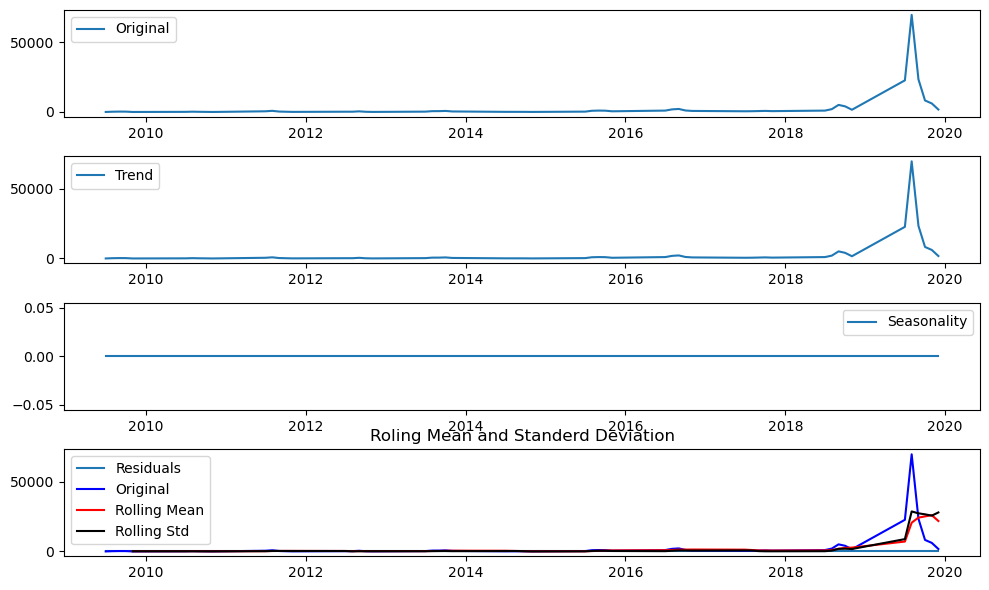

Result of Dickey Fuller Test: 
Test Statistic                  -3.946064
p-value                          0.001721
#Lags Used                       0.000000
Number of Observations Used     55.000000
Critical Value (1%)             -3.555273
Critical Value (5%)             -2.915731
Critical Value (10%)            -2.595670
dtype: float64


In [38]:
plt.subplot(411)
plt.plot(indexedDengu["Cases"], label = 'Original')
plt.legend(loc= 'best')

plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc= 'best')

plt.subplot(413)
plt.plot(seasonal, label = "Seasonality")
plt.legend(loc= 'best')

plt.subplot(414)
plt.plot(residual, label = "Residuals")
plt.legend(loc= 'best')

plt.tight_layout()
decomposedLogData = residual
decomposedLogData.dropna(inplace = True)
test_stationarity(indexedDengu["Cases"])

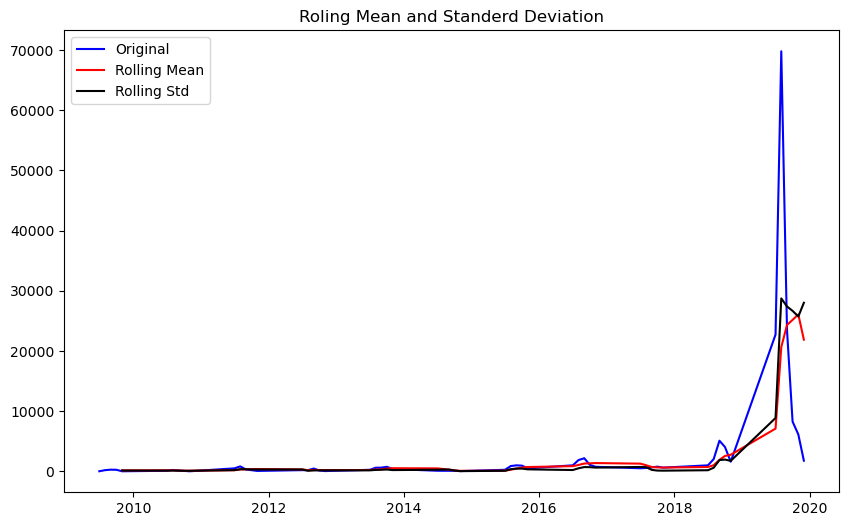

Result of Dickey Fuller Test: 
Test Statistic                  -3.946064
p-value                          0.001721
#Lags Used                       0.000000
Number of Observations Used     55.000000
Critical Value (1%)             -3.555273
Critical Value (5%)             -2.915731
Critical Value (10%)            -2.595670
dtype: float64


In [39]:
#check noice 
decomposedLogData = residual
decomposedLogData.dropna(inplace = True)
test_stationarity(indexedDengu["Cases"])

# Autocorrelation function(ACF) and Partial Autocorrelation Function(PACF) Graph

ACF Definition - A function which gives us values of auto-correlation of any series with its lagged values.

PACF Definition - An indirect function to find Auto correlation after removing the relationship explained by previous lags

In [40]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf  = acf (indexedDengu["Cases"], nlags= 20)
lag_pacf = pacf(indexedDengu["Cases"], nlags= 20, method ='ols') 
#ols =Ordinary Least Squares regression method

I:\ML-Code\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


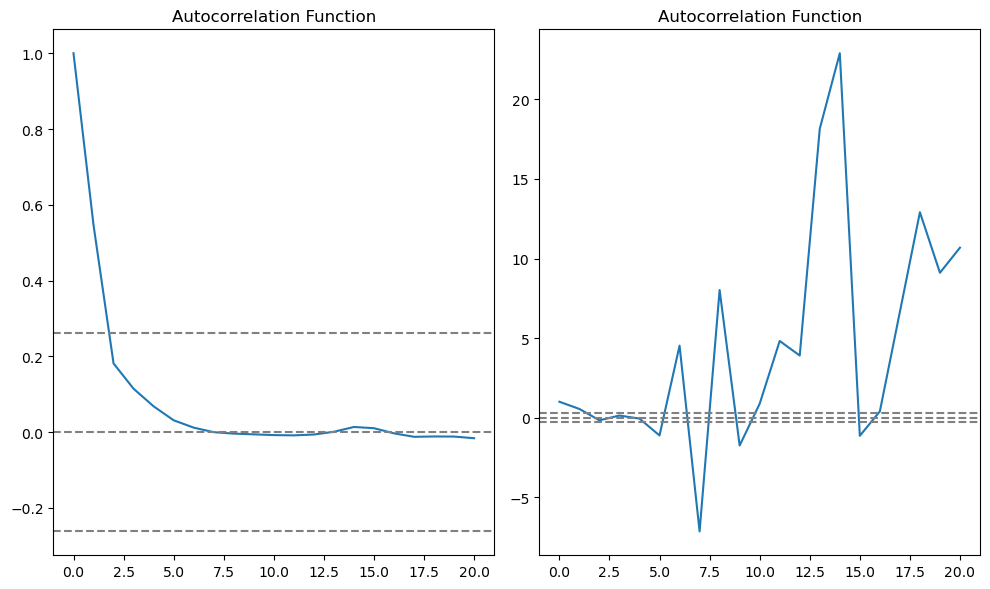

In [41]:
#plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y= 0 , linestyle= '--', color= 'gray')
plt.axhline(y=-1.96/np.sqrt(len(indexedDengu["Cases"])) , linestyle= '--', color= 'gray')
plt.axhline(y= 1.96/np.sqrt(len(indexedDengu["Cases"])) , linestyle= '--', color= 'gray')
plt.title("Autocorrelation Function")

#plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y= 0 , linestyle= '--', color= 'gray')
plt.axhline(y=-1.96/np.sqrt(len(indexedDengu["Cases"])) , linestyle= '--', color= 'gray')
plt.axhline(y= 1.96/np.sqrt(len(indexedDengu["Cases"])) , linestyle= '--', color= 'gray')
plt.title("Autocorrelation Function")
plt.tight_layout()

In [42]:
import pmdarima as pm
def arimamodel(timeseries):
    automodel = pm.auto_arima(timeseries, 
                              start_p=3, 
                              start_q=3,
                              max_p=5,
                              max_q=5,
                              test="adf",
                              seasonal=True,
                              trace=True)
    return automodel

In [43]:
import statsmodels.api as sm

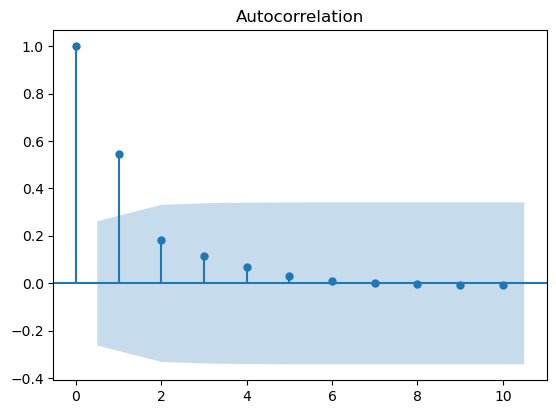

In [45]:
# ACF Graph
fig = plt.figure(figsize= (14,10))
ax1 = fig.add_subplot(221)
fig = sm.graphics.tsa.plot_acf(indexedDengu["Cases"].dropna(), lags=10 ,ax= ax1)

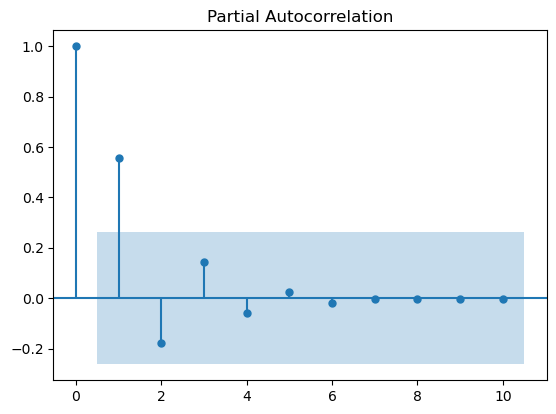

In [46]:
# PACF Graph
fig = plt.figure(figsize= (14,10))
ax2 = fig.add_subplot(221)
fig = sm.graphics.tsa.plot_pacf(indexedDengu["Cases"].dropna(), lags=10 ,ax= ax2)

In [47]:
arimamodel(indexedDengu["Cases"])

Performing stepwise search to minimize aic
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.63 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1168.979, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1170.470, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1169.292, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1166.989, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.827 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

# Autoregressive Integrated Moving Average (ARIMA)

In [48]:
#from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

Plotting ARIMA Model


I:\ML-Code\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
I:\ML-Code\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
I:\ML-Code\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


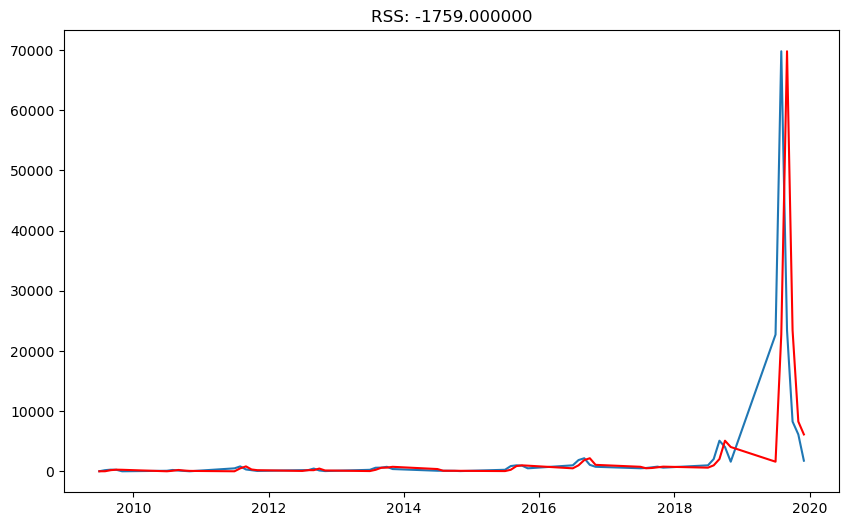

In [49]:
model = sm.tsa.arima.ARIMA(indexedDengu["Cases"], order = (0,1,0))
result_ARIMA = model.fit()

plt.plot(indexedDengu["Cases"])
plt.plot(result_ARIMA.fittedvalues, color= 'red')
plt.title("RSS: %4f" %sum(result_ARIMA.fittedvalues-indexedDengu["Cases"]))
print("Plotting ARIMA Model")

In [57]:
result_ARIMA.predict(10,55)

year
2011-07-01        0.0
2011-08-01      487.0
2011-09-01      813.0
2011-10-01      301.0
2011-11-01      181.0
2012-07-01       58.0
2012-08-01      187.0
2012-09-01      183.0
2012-10-01      453.0
2012-11-01      134.0
2013-07-01       35.0
2013-08-01      243.0
2013-09-01      587.0
2013-10-01      606.0
2013-11-01      742.0
2014-07-01      371.0
2014-08-01       89.0
2014-09-01       86.0
2014-10-01       81.0
2014-11-01       76.0
2015-07-01       32.0
2015-08-01      249.0
2015-09-01      868.0
2015-10-01      987.0
2015-11-01      931.0
2016-07-01      492.0
2016-08-01      989.0
2016-09-01     1864.0
2016-10-01     2167.0
2016-11-01     1068.0
2017-07-01      747.0
2017-08-01      501.0
2017-09-01      547.0
2017-10-01      654.0
2017-11-01      769.0
2018-07-01      603.0
2018-08-01      987.0
2018-09-01     2031.0
2018-10-01     5082.0
2018-11-01     4034.0
2019-07-01     1591.0
2019-08-01    22723.0
2019-09-01    69816.0
2019-10-01    23429.0
2019-11-01     8264.0
2019-

In [53]:
result_ARIMA.predict(10,60)

I:\ML-Code\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


10        0.0
11      487.0
12      813.0
13      301.0
14      181.0
15       58.0
16      187.0
17      183.0
18      453.0
19      134.0
20       35.0
21      243.0
22      587.0
23      606.0
24      742.0
25      371.0
26       89.0
27       86.0
28       81.0
29       76.0
30       32.0
31      249.0
32      868.0
33      987.0
34      931.0
35      492.0
36      989.0
37     1864.0
38     2167.0
39     1068.0
40      747.0
41      501.0
42      547.0
43      654.0
44      769.0
45      603.0
46      987.0
47     2031.0
48     5082.0
49     4034.0
50     1591.0
51    22723.0
52    69816.0
53    23429.0
54     8264.0
55     6125.0
56     1759.0
57     1759.0
58     1759.0
59     1759.0
60     1759.0
Name: predicted_mean, dtype: float64